In [4]:
import numpy as np
from utils import *
import pandas as pd

In [5]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = ['Ireland', 'Germany', 'Great Britain', 'France', 'Sweden', 'Finland', 'Belgium']

formatted_array = [i for i in range(n_rounds)]

In [3]:
def create_matrix_with_correlated_zeros(num_rows, num_cols, num_zeros_per_row, correlation_strength=0.8):
    """
    Create a matrix with ones and zeros, with the exact number of zeros per row,
    while introducing positive correlation among the zero positions.
    
    Args:
        num_rows: Number of rows in the matrix.
        num_cols: Number of columns in the matrix.
        num_zeros_per_row: List of number of zeros per row (must be less than or equal to num_cols for each row).
        correlation_strength: A value between 0 and 1, indicating how strongly the zeros should cluster together (1 is strongest).
        
    Returns:
        A numpy matrix with ones and zeros, where zeros are positively correlated.
    """
    matrix = np.ones((num_rows, num_cols), dtype=int)
    
    for i in range(num_rows):
        num_zeros = num_zeros_per_row[i]
        if num_zeros < 0 or num_zeros > num_cols:
            raise ValueError("Invalid number of zeros per row.")
        
        # Start by randomly picking the first zero's position
        first_zero = np.random.randint(0, num_cols)
        zero_positions = [first_zero]
        
        # Keep placing the remaining zeros
        for _ in range(1, num_zeros):
            # Create a probability distribution biased toward adjacent positions
            prob_dist = np.ones(num_cols)
            for pos in zero_positions:
                # Increase probabilities near existing zeros to introduce positive correlation
                if pos > 0:
                    prob_dist[pos - 1] += correlation_strength
                if pos < num_cols - 1:
                    prob_dist[pos + 1] += correlation_strength
            
            # Mask positions that already have zeros
            prob_dist[zero_positions] = 0
            
            # Normalize the probability distribution
            prob_dist /= prob_dist.sum()
            
            # Choose the next zero based on the biased probability distribution
            next_zero = np.random.choice(num_cols, p=prob_dist)
            zero_positions.append(next_zero)
        
        # Set the selected zero positions in the current row
        matrix[i, zero_positions] = 0
    
    return matrix

def pipeline(matrix):
    matrix = create_matrix_with_correlated_zeros(num_rows, num_cols, num_zeros_per_row, correlation_strength)

    availability_matrix  = pd.DataFrame(matrix, index = countries, columns = formatted_array)
    plot_availability_heatmap("Availability with carbon budget", availability_matrix, key_word='test', folder='figures/tests')


    lam2_list, corr = av_mat_corr(availability_matrix)
    print('Countries lambda_2: ',list(np.round(lam2_list, 2)))
    print('Mean lambda_2: ',np.round(corr, 2))

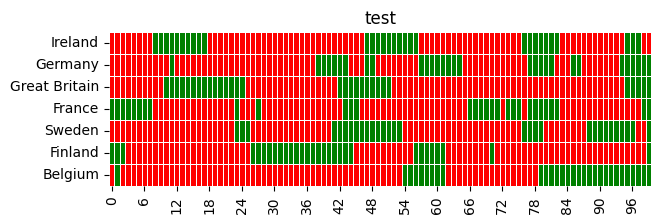

Countries lambda_2:  [0.81, 0.69, 0.89, 0.66, 0.79, 0.8, 0.89]
Mean lambda_2:  0.79


In [25]:
# Example usage:
num_rows = 7
num_cols = 100
num_zeros_per_row = [70 for i in range(num_rows)]  # Exact number of zeros per row
correlation_strength = 50  # Strong positive correlation

